[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


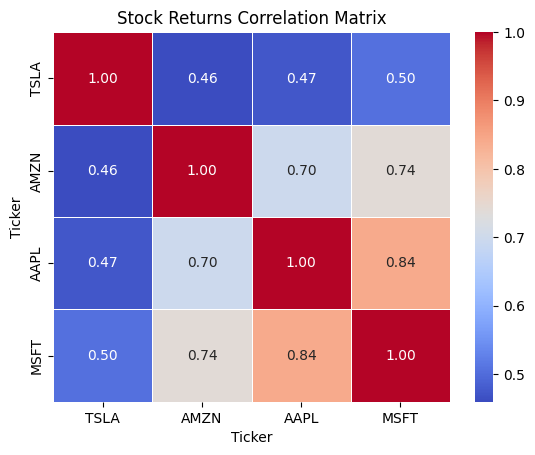

In [18]:
from stock import Stock
from portfolio import Portfolio

%load_ext autoreload
%autoreload 2


tsla = Stock('TSLA', 0.01)
amzn = Stock('AMZN', 0.01)
aapl = Stock('AAPL', 0.01)
msft = Stock('MSFT', 0.01)

portfolio = Portfolio()
portfolio.add_stock(tsla)
portfolio.add_stock(amzn)
portfolio.add_stock(aapl)
portfolio.add_stock(msft)

portfolio.compute_correlation_matrix(start_date='2020-01-01', end_date='2020-12-31')

portfolio.plot_correlation_matrix(start_date='2020-01-01', end_date='2020-12-31')



In [ ]:
import yfinance as yf

aapl = yf.Ticker("AAPL")
data = aapl.history(period="5y")
print(data)




Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
AAPL: No price data found, symbol may be delisted (period=5d)


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [2]:
from portfolio_optimization import optimization
from portfolio import Portfolio
from stock import Stock

%load_ext autoreload
%autoreload 2

portfolio = Portfolio()
portfolio.add_stock(Stock('TSLA', 0.01))
portfolio.add_stock(Stock('META', 0.01))



optimization = optimization(portfolio)
weights = optimization.optimize_sharpe_ratio('2020-01-01', '2020-12-31')


ModuleNotFoundError: No module named 'portfolio_optimization'

In [31]:
weights

array([0.5, 0.5])

In [34]:
from backtesting import backtesting

portfolio = Portfolio()
portfolio.add_stock(Stock('TSLA', 0.01))
portfolio.add_stock(Stock('META', 0.01))

backtesting = backtesting(portfolio, 100000, weights)
backtesting.backtest('2020-01-01', '2020-12-31')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: Unable to coerce to Series, length must be 1: given 252

In [1]:
import yfinance as yf

tickers = ['TSLA', 'META']

start_date = '2020-01-01'
end_date = '2020-12-31'

data = yf.download(tickers, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [ ]:
data["Close"].pct_change().dropna().mean()


0.001454235840538521

In [12]:
%pwd

'/Users/zaid.elkasemy@dataiku.com/Desktop/Zaid/Python/Finance'

In [20]:
from src.settings import PortfolioSettings
from src.optimization import OptimizationPortfolio

%load_ext autoreload
%autoreload 2

settings = PortfolioSettings(capital=100000, tickers=['META', 'AAPL', 'MSFT', 'AMZN'])

optimization = OptimizationPortfolio(settings, '2020-01-01', '2024-12-31')

optimization.optimize()

print(optimization.weights)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Optimizing portfolio for ['META', 'AAPL', 'MSFT', 'AMZN']
{'META': 5.412337245047638e-15, 'AAPL': 0.0, 'MSFT': 2.4424906541753444e-15, 'AMZN': 0.9999999999999933}


In [26]:
from src.simulation import SimulationPortfolio

simulation = SimulationPortfolio(settings, '2020-01-01', '2024-12-31', optimization.get_weights())

simulation.get_data()

simulation.compute_expected_returns()

[*********************100%***********************]  4 of 4 completed


133191.61545995093

In [23]:
import yfinance as yf
tickers = settings.tickers

data = yf.download(tickers, start='2020-01-01', end='2024-12-31')


print(data.iloc[[0, -1]])



[*********************100%***********************]  4 of 4 completed

Price            Close                                            High  \
Ticker            AAPL        AMZN        META        MSFT        AAPL   
Date                                                                     
2020-01-02   72.716072   94.900497  208.795929  153.323273   72.776598   
2024-12-30  251.923019  221.300003  590.714417  423.979858  253.221595   

Price                                                  Low              \
Ticker            AMZN        META        MSFT        AAPL        AMZN   
Date                                                                     
2020-01-02   94.900497  208.805877  153.428276   71.466812   93.207497   
2024-12-30  223.000000  596.409362  426.694417  250.474615  218.429993   

Price                                     Open                          \
Ticker            META        MSFT        AAPL        AMZN        META   
Date                                                                     
2020-01-02  205.302400  151.137310  